<font  size = 6> **Dualidade - Uma forma mais interessante de implementar os classificadores Lineares** </font>


Nome: Alan Pinheiro DRE : 114150892

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
dirname = os.path.dirname(os.path.abspath(''))

<font size = 5 >  Conteudo desse Notebook:</font>
<ol>
    <li><a href="#1.">Introdução</a></li>
    <li><a href="#2.">Revisando a implementação do Perceptron</a></li>
    <li><a href="#3.">A Dualidade do Perceptron</a></li>
    <li><a href="#4.">Aprendendo a classificar dados não linearmente separáveis</a>
        <ol>
            <li><a href="#4a.">Expansão da Base</a></li> 
            <li><a href="#4b.">O truque do Kernel</a></li>
            <li><a href="#4c.">As funções de Kernel</a></li></ol>
    <li><a href="#5.">Aplicação</a></li>
</ol>

<font id="1." color = 'red' size = 4 > *1. Introdução*</font>


Um tradicional problema de machine learning é aquele onde desejamos associar a uma dada observação, um rótulo de classe (feature alvo), em função das váriaveis observadas. Trata-se de um caso supervisionado de aprendizagem, onde as relações entre as variáveis observadas e a feature alvo são aprendidadas em um conjunto de treino onde o rótulo de classe é conhecido. Uma vez aprendida essas relações, o modelo é usado em um outro conjunto de observações a fim de rotulá-las. Existem diversas aplicações de machine learning onde nos deparamos com o problema de classificação como: Customer target marketing, Medical disease management,Document categorization and filtering, Multimedia data analysis, etc.

O problema de classificação pode ser formalmente definido da seguinte forma:Seja $M$ uma $nxd$ Matriz de treino, e um valor (`label`) pertencente a $\{1,2,..,k-1,k\}$ associado para cada uma das $n$ linhas de $M$, criar um modelo de treino CFL, que possa ser usado para predizer a classe (label) de $ T \in \mathbb{R}^d $.

Uma abordagem para esse problema é utilizar classificadores lineares, onde uma borda de decisão linear que divide o domínio $ \mathbb{R}^d$ em dois, e classifica os pontos $ x \in \mathbb{R}^d$ de acordo com o sinal de : $<w;x> + b$ , onde $w \in \mathbb{R}^d$ é o vetor normal que representa a borda de decisão linear e  $b$ o bias. Um Modelo desse tipo é o perceptron.

Apesar de linear, o Perceptron podem também ser empregado na classificação de dados não linearmente separáveis através dos chamados métodos de Kernel, no entanto, para que esses modelos possam performar de forma eficiente uma nova forma de implementá-lós foi pensada, uma forma Dual, e será apresentada nesse trabalho.

Esse documento esta estruturado da seguinte forma: No capítulo 2 será apresentada a uma revisão da implementação tradicional do Perceptron, no capítulo 3 seŕa apresentada a representação dual do perceptron, no capítulo 4 serão mostradas formas pelas quais podemos aplicar os modelos apresentados em dados não linearmente separáveis e as vantagens da representação dual e por fim, no capítulo 5 serão mostradas as aplicações. 




<font id="2." color = 'red' size = 4 > *2. Revisando a implementação do Perceptron*</font>

**Perceptron e o Perceptron Learning Algorithm (PLA)**

O Perceptron Learning Algorithm (PLA) é usado para aprender o vetor $w$ e o parâmetro $b$ que representam a borda linear de decisão. Sua implementação tradicional é a seguinte, exemplificando um caso binário, onde $ y_i \in \{+1,-1\}$ é a classificação correta para cada $x_i \in \mathbb{R}^d$ (linha) da Matrix $M_{nxd}$. 

O PLA segue os seguntes passos:
<ul>$*$ Inicialize $ w = 0 $, $ w \in \mathbb{R}^d$;</ul>
<ul>$*$ Enquanto algum ponto $ \{x_i,y_i\}$ é classificado errado:</ul>
<ol>
    <ul>$ * w_{i+1} = w_{i} + y_i.x_i$</ul>
    <ul>$ * b = b + y_i$</ul></ol>
</ol>

O resultado do PLA é $w \in \mathbb{R}^d $ e $b$, o bias, e sua convergência é assegurada, sob a hipótese de dados linearmente separados.

<font id="3." color = 'red' size = 4 > *3. A Dualidade do Perceptron*</font>

Ao nos atentarmos a resposta final para $w$ podemos reescrevê-la da seguinte foma:
$$ w = \sum_{i} \alpha_i y_i.x_i$$
onde $ \alpha_i $  é o número de vezes que ocorreu um update no ponto i (número de vezes que foi mal classificado até a convergência), isso significa que a resposta final (a borda de decisão linear) pode ser representada como o  vetor $w \in \mathbb{R}^d $ ou equivalentemente nós podemos representar a resposta final em função dos coeficientes $\alpha = (\alpha_1,...,\alpha_n), \alpha \in \mathbb{R}^n$ que é um vetor de números naturais que contem a contagem das atualizações em cada ponto. Sendo assim podemos reescrever o PLA apenas em termos de $ \alpha$ da seguinte maneira:

O PLA Dual segue os seguintes passos:

 <ul>$*$Inicialize $\alpha = 0 $, $ \alpha \in \mathbb{R}^n$;</ul>
 <ul>$*$ Enquanto algum ponto $ \{x_i,y_i\}$ é classificado errado:</ul>
<ol><ul>$* \alpha_{i} = \alpha_{i} + 1$</ul>
 <ul>$*  b = b + y_i$</ul>
</ol>    

O resultado do PLA é $\alpha \in \mathbb{R}^n $ e $b$, o bias, e sua convergência é assegurada, sob a hipótese de dados linearmente separados.

<font id="4." color = 'red' size = 4. > *4. Aprendendo a classificar dados não linearmente separáveis*</font>

A maioria dos dados encontrados em aplicações reais não são linearmente separáveis, sendo assim, o Perceptron não pode ser diretamente empregado para classificá-los, no entanto, com o emprego dos chamados métodos de Kernel, podemos usá-los para aprendermos bordas de decisão que são quadrádicas, polinomiais ou até mais complicadas. Existe uma série de ideias para tornar isso possível, e a seguir serão apresentados os conceitos de Expansão da base, O truque do Kernel e Funções de Kernel.

<font id="4a."> **A. Expansão da Base**</font>

Como podemos aprender uma borda de decisão que está muito longe de ser linear? E se a borda de decisão for uma parábola, uma função quadrática? O gráfico abaixo mostra uma situação, onde os pontos são separados por uma parábola, com a seguinte equação: $ x_1 = x_2^2 + 5 $

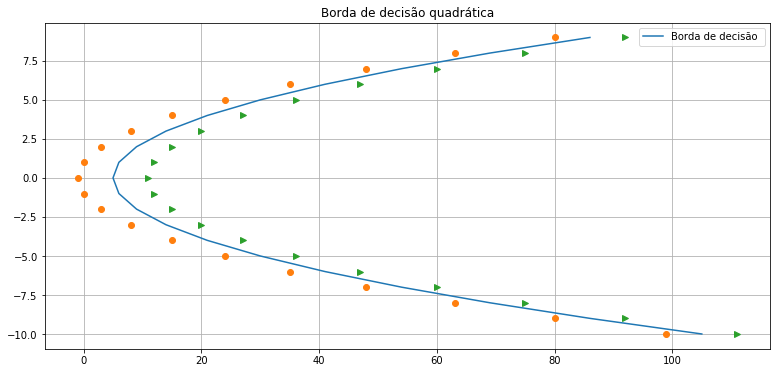

In [2]:
plt.figure(figsize=(13,6))
x2 = np.arange(-10,10)
x1 = x2**2+5
plt.plot(x1,x2)
plt.plot(x1-6,x2,'o')
plt.plot(x1+6,x2,'>')
plt.title('Borda de decisão quadrática')
plt.legend(['Borda de decisão '])
plt.grid(True)
plt.show()

Nesse exemplo temos que a borda de decisão é quadrática em $ x = (x_1,x_2)$, mas é linear em $\phi(x) = (x_1,x_2,x_1^2,x_2^2,x_1x_2)$. E essa é a ideia da expansão da base, onde os dados são levados para um novo espaço, onde podemos usar o classificador linear. Nesse caso o espaço original é o $ x \in \mathbb{R}^2$ e $ \phi(x) \in \mathbb{R}^5$.

E podemos escrever nossa borda de decisão $ x_1 - x_2^2 - 5$, que é quadrática em $\mathbb{R}^2$, como: $<w;\phi(x)>+b = 0$, com $w = (1,0,0,-1,0)$ e $b = -5$

Agora, vamos analisar o que ocorre quando $x \in \mathbb{R}^d , x = (x_1,x_2,x_3,...x_d)$, e supondo que a borda de decisão seja quadrática, $ \phi(x)$, será da seguinte forma: $\phi(x)= (x_1,...x_d,x_1^2,...,x_d^2,x_1x_2,...,x_{d-1}x_d)$

Como podemos notar, essa representação expandida $\phi(x)$ pode assumir dimensões extremamente altas dependendo do espaço original, na verdade, a dimensão de $\phi(x)$ é aproximadamente $O(d^2)$, pois:

<p>$\phi(x) = (x_1,..,x_d, \rightarrow d $ features originais;</p>
<p>$\ \ \ \ \ \ \ \ \ \ \ \  x_1^2,...,x_d^2, \rightarrow d $ termos quadráticos</p>
<p>$\ \ \ \ \ \ \ \ \ \ \ \  x_1x_2,...,x_1x_2) \rightarrow $${d}\choose{2} $ termos cruzados</p>

Dim = $2d + \frac{d(d-1}{2}$

Dessa forma, nos podemos aplicar o PLA da seguinte maneira:

<ul>$*$ Inicialize $ w = 0 $, $ w : O(d^2)$;</ul>
<ul>$*$ Enquanto algum ponto $ \{\phi(x_i),y_i\}$ é classificado errado:</ul>
<ol>
    <ul>$ * w_{i+1} = w_{i} + y_i.\phi(x_i)$</ul>
    <ul>$ * b = b + y_i$</ul></ol>
</ol>




Esse é um modelo capaz de aprender bordas de decisão quadráticas, vamos olhar o que ele é capaz de fazer:

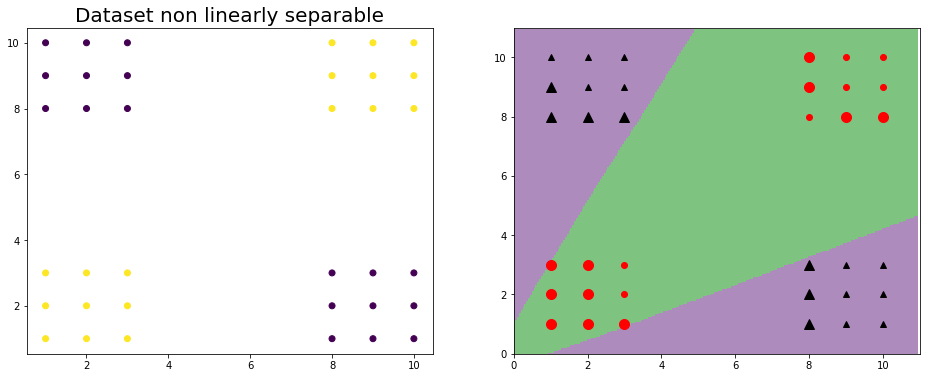

In [16]:
# essa linha foi rodada no final do relatório
learn_and_display_Kernel_Perceptron(data[1],'polly',2,C_value=1.0, s_value=1.0)

<font id="4b."> **B. O Truque do Kernel**</font>

Vimos que podemos aprender bordas de decisão quadráticas, ao aplicarmos a ideia de adicionarmos features extras aos dados. Porém o a dimensão de $\phi(x)$ pode ser muito alta o que além de inconveniente,inviabiliza qualquer aplicação na vida real.

Nessa seção, iremos aprender uma forma de contornar esse problema utilizando o chamado Truque do Kernel. Iremos deduzi-lo e implementá-lo para o caso de bordas de decisão quadráticas.

A ideia do Truque do Kernel é implementar o PLA sem precisar escrever efetivamente um vetor em dimensão alta.

Tomemos por exemplo o famoso dataset MNIST, onde $ x \in \mathbb{R}^{784}$ e aplicamos o algoritmo apresentado na seção anterior, nesse caso temos: $\phi(x) \in \mathbb{R}^{300000}$ e $ w \in \mathbb{R}^{300000} $. Como $w$ é a resposta final, não podemos deixar de escrevê-lo como pressupoe o truque do kernel.

Para não precisarmos escrever um vetor $ w \in \mathbb{R}^{300000} $,podemos utilizar a forma dual apresentada nesse relatório: $ w = \sum_{j} \alpha_j y_j.\phi(x_j)$, pois $w$ é uma combinação linear de $\phi(x)$ Dessa forma resolvemos o problema de termos que representar um vetor pertencente a dimensão 300000.

No entanto, para classificar um dado ponto, ainda precisamos computar $<w;\phi(x)>$, que usando a representação dual é da seguinte forma:

$$<w;\phi(x_i)> =  \sum_{j}^n \alpha_j y_j.(\phi(x_j).\phi(x_i))$$

Então para computar o produto enterno $<w;\phi(x_i)>$, nós simplesmente somamos sobre todos os pontos do dataset de indice $j$,o numero de vezes que o ponto foi atualizado, o label desse ponto e o produto interno entre $\phi(x_j) e \phi(x_i)$. 

Mas ainda precisamos computar o pruduto interno $<\phi(x_j);\phi(x_i)>$ o que em um primeiro momento aparenta ser uma tarefa custosa, visto que são vetores em alta dimensão.

O truque do Kernel, nos possibilida calcular esse produto sem escrever os vetores $\phi(x_j) e \phi(x_i)$ e a seguir veremos como isso é possível para um caso 2-d.


Suponhamos que $x = (x_1,x_2)$, então $\phi(x) = (x_1,x_2,x_1^2,x_2^2,x_1x_2)$

Vamos modificar um pouco $\phi(x)$ para  $\phi(x) = (1,\sqrt{2}x_1,\sqrt{2}x_2,x_1^2,x_2^2,\sqrt{2}x_1x_2)$, nós estamos adicionando uma nova feature que é igual a 1 e multiplicando outras por $\sqrt{2}$. Nós podemos fazer isso, porque qualquer função que seja linear na $\phi(x)$ original, será linear na nova $\phi(x)$.

Vamos agora calcular $<\phi(x);\phi(z)>$...

<p>$ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \   = (1,\sqrt{2}x_1,\sqrt{2}x_2,x_1^2,x_2^2,\sqrt{2}x_1x_2) * $
$(1,\sqrt{2}z_1,\sqrt{2}z_2,z_1^2,z_2^2,\sqrt{2}z_1z_2)$</p> 
<p>$\ \ \ \ \ \ \  \ \ \  \ \ \ \ \ \ \ \ \ \ = 1 + 2x_1z_1+2x_2z_2+x_1^2z_1^2+x_2^2z_2^2+2x_1x_2z_1z_2$</p> 
<p>$\ \ \ \ \ \ \  \ \ \  \ \ \ \ \ \ \ \ \ \ = (1 + x_1z_1+x_2z_2)^2$</p> 
<p>$\ \ \ \ \ \ \  \ \ \  \ \ \ \ \ \ \ \ \ \ = (1 + <x ; z>)^2$</p> 


Isso nos diz que o produto interno entre dois vetores em alta dimenção é o quadrado da soma do produto interno dos vetores na dimensão original com um e essa dedução pode ser expandida para o caso d- dimensional. E podemos extender também essa dedução para aprender bordas de decisão que são polinômios de grau $p$,pois $<\phi(x);\phi(z)$ pode ser descrito para uma polinômio de ordem p como: $$(1 + <x ; z>)^p$$










<font id="4c."> **C. Funções de Kernel**</font>

Nós vimos como o Perceptron, um modelo que pode ser implementado em 4 linhas de código pode ser usado para 
classificar dados que são separados por bordas de decisão polinomiais utilizando a ideia de expansão da base e utilizando o truque do kernel e a representação dual para viabilizar a aplicação dessa ideia.

No entanto, podemos ir além, se nos atentarmos para o Kernel Perceptron, a parte central é o que chamaremos de Kernel function que é justamente o produto interno em alta dimenção: $$<w;\phi(x_i)> =  \sum_{j}^n \alpha_j y_j.\color{red}{(\phi(x_j).\phi(x_i))}$$

portanto, podemos reescrever $<w;\phi(x_i)>$ em função da função de Kernel:
$$<w;\phi(x_i)> =  \sum_{j}^n \alpha_j y_j.K(x_j,x_i)$$ 

E um novo ponto $x$ é classificado de acordo com:
$$sign( \sum_{j}^n \alpha_j y_j.K(x_j,x)+b)$$

O conceito de função de Kernel nos permite desvenciliar da ideia de bordas de decisão, pois a podemos entender a função de Kernel como uma certa medida de similaridade entre os pontos do dataset, pois quanto mais próximos dois pontos estiverem,mais alinhados estarão seus vetores e maior será o produto interno entre eles. Sendo assim podemos reescrever por completo o Kernel Perceptron learning algoritmo:

 <ul>$*$Inicialize $\alpha = 0 $, $ \alpha \in \mathbb{R}^n$;</ul>
 <ul>$*$ Enquanto algum ponto $ \{x_i,y_i\}$ é classificado errado, ou seja, $sign( \sum_{j}^n \alpha_j y_j.K(x_j,x_i)+b) \neq y_i$:</ul>
<ol><ul>$* \alpha_{i} = \alpha_{i} + 1$</ul>
 <ul>$*  b = b + y_i$</ul>
</ol>   

Se nos atentarmos para o somatório, percebemos que é algum tipo de voto ponderado por similaridade o que usamos para classificar:

$$F(x)=\alpha_1y_1k(x_1,xi)+...+\alpha_ny_nk(x_n,xi)$$

mais o bias b*


Ou seja, para classificar um novo ponto $x_i$, nós calculamos a similaridade com o primeiro datapoint, com o segundo, até o ultimo ponto da matriz de treino e baseado nessa similaridade, nós temos uma ponderação dos labels desses pontos do dataset.

Sendo assim, nó podemos definir uma similaridade que nos é pertinente e aplicarmos o perceptron para classificação. No entanto, a medida de similaridade (função de núcleo) deve corresponder ao produto interno dos vetores um algum espaço de alta dimenção, não necessariamente importando qual espaço seja esse. Portanto, para estabelecermos uma função de similaridade, basta assegurarmos apenas essa condição.

Essa constatação pode ser feita ao atendermos a condição de Mercer que diz o seguinte: 

<font color = blue>*Se para qualquer conjunto finito de pontos $x_1,x_2,..,x_m$, a matrix $A_{mxm}$ dada por: $A_{ij} = k(_i,x_j)$ é positiva semidefinida, então k é uma medida de similaridade válida*</font>



Uma função de similaridade muito popular é a **Gaussian Kernel** ou **RBF kernel** dada por:
$$k(x,z) = e^{||x-z||^2/s^2} \in [0,1]$$ 

Essa função corresponde ao produto interno entre $\phi(x)$ e re $\phi(z)$ em uma dimensão infinita. 

<font id="5." color = 'red' size = 4. > *5. Aplicação*</font>

A seguir iremos mostrar a aplicação dos conceitos apresentados em datasets ilustrativos. A implementação do Kernel Perceptron esta na célula abaixo:

In [18]:
import numpy as np
from numpy import linalg

# funções de Kernel

def linear_kernel(x1, x2): 
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / ((sigma ** 2)))

# Perceptron tradicional
class Perceptron(object):

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features, dtype=np.float64)
        self.b = 0.0
        coverge = False
        while not converge:
            converge = True
            for i in range(n_samples):
                if self.predict(X[i])[0] != y[i]:
                    self.w += y[i] * X[i]
                    self.b += y[i]
                    converge = False
                    

    def project(self, X):
        return np.dot(X, self.w) + self.b

    def predict(self, X):
        X = np.atleast_2d(X)
        return np.sign(self.project(X))

# Kernel perceptron
class KernelPerceptron(object):

    def __init__(self, kernel=linear_kernel, T=2):
        self.kernel = kernel
        self.T = T # parametro sigma para o RBF ou o parâmetro P para polinomios 

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples, dtype=np.float64)

        # matriz de similaridade
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j],self.T)

        converge = False
        it = 0
        while converge == False:
            converge = True
            for i in range(n_samples):
                
                if np.sign(np.sum(K[:,i] * self.alpha * y)) != y[i]:
                    self.alpha[i] += 1.0
                    converge = False
     

        
        sv = self.alpha > 1e-5 
        self.ind = np.arange(len(self.alpha))[sv]
        self.alpha = self.alpha[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

    def project(self, X):
        y_predict = np.zeros(len(X))
        for i in range(len(X)):
            s = 0
            for a, sv_y, sv in zip(self.alpha, self.sv_y, self.sv):
                s += a * sv_y * self.kernel(X[i], sv,self.T)
            y_predict[i] = s
        
        return y_predict

    def predict(self, X):
        X = np.atleast_2d(X)
        n_samples, n_features = X.shape
        
        return np.sign(self.project(X))

A função definida para a visualização esta na linha abaixo:

In [4]:
def learn_and_display_Kernel_Perceptron(datafile, kernel_type='rbf',S_p = 20,C_value=1.0, s_value=1.0):
    data = np.loadtxt(dirname+'/Datasets/ToyData/'+datafile)
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    # Now train Kernel_perceptron
    if kernel_type == 'rbf':
        clf = KernelPerceptron(gaussian_kernel,S_p)
    if kernel_type == 'polly':
        clf = KernelPerceptron(polynomial_kernel,S_p)
    clf.fit(x,y)
    sv = np.zeros(n,dtype=bool)

    sv[clf.ind] = True
    notsv = np.logical_not(sv)
    
    fig = plt.figure(figsize=(16,6))
    ax1 = fig.add_subplot(1,2,1)
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.title('Dataset non linearly separable', fontsize=20)
    
    
    # Determine the x1- and x2- limits of the plot
    ax2 = fig.add_subplot(1,2,2)
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
   
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points, enlarging those that are support vectors
    plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
    plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
    plt.plot(x[(y==-1)*notsv,0], x[(y==-1)*notsv,1], 'k^')
    plt.plot(x[(y==-1)*sv,0], x[(y==-1)*sv,1], 'k^', markersize=10)
    # Construct a grid of points and evaluate classifier at each grid points
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = clf.predict(grid)
    # Quantize the values to -1, -0.5, 0, 0.5, 1 for display purposes
    for i in range(len(Z)):
        Z[i] = min(Z[i],1.0)
        Z[i] = max(Z[i],-1.0)
        if (Z[i] > 0.0) and (Z[i] < 1.0):
            Z[i] = 0.5
        if (Z[i] < 0.0) and (Z[i] > -1.0):
            Z[i] = -0.5
    # Show boundary and margin using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)
    plt.show()

## Resultados Para bordas quadráticas

In [5]:
data = ["data1.txt","data2.txt","data3.txt","data4.txt","data5.txt"]

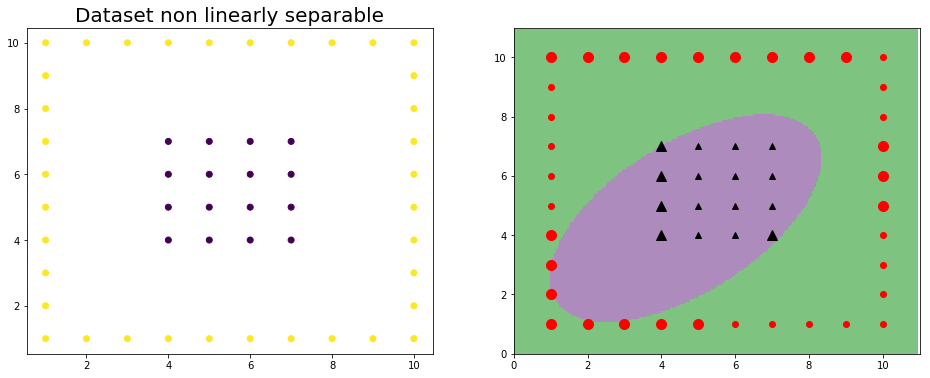

In [6]:
learn_and_display_Kernel_Perceptron(data[0],'polly',2,C_value=1.0, s_value=1.0)

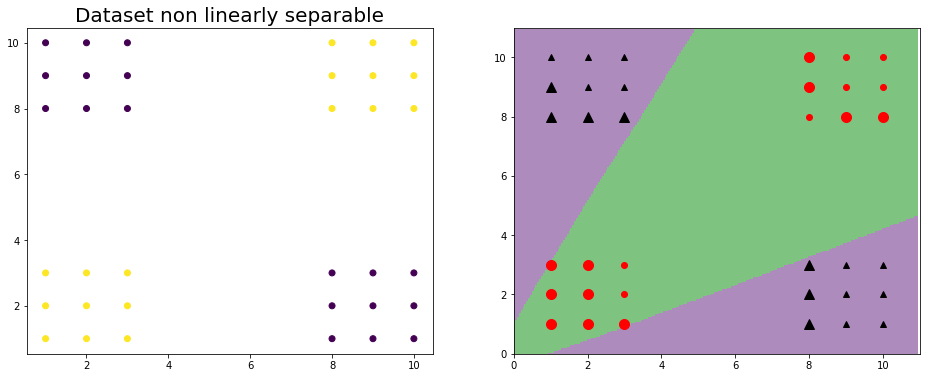

In [7]:
learn_and_display_Kernel_Perceptron(data[1],'polly',2,C_value=1.0, s_value=1.0)

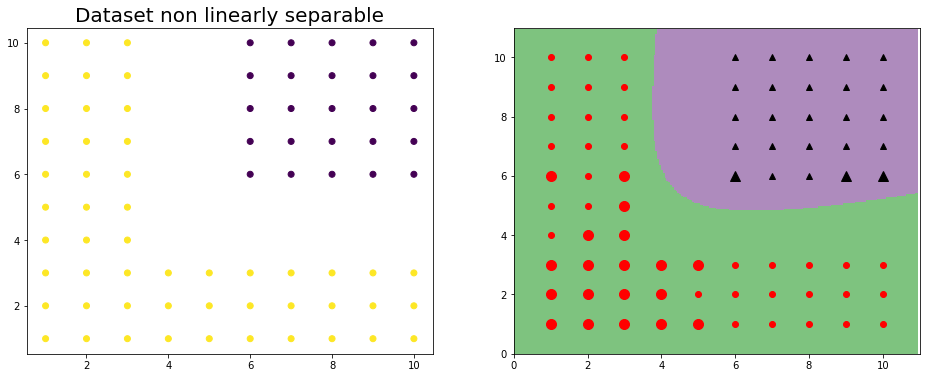

In [8]:
learn_and_display_Kernel_Perceptron(data[3],'polly',2,C_value=1.0, s_value=1.0)

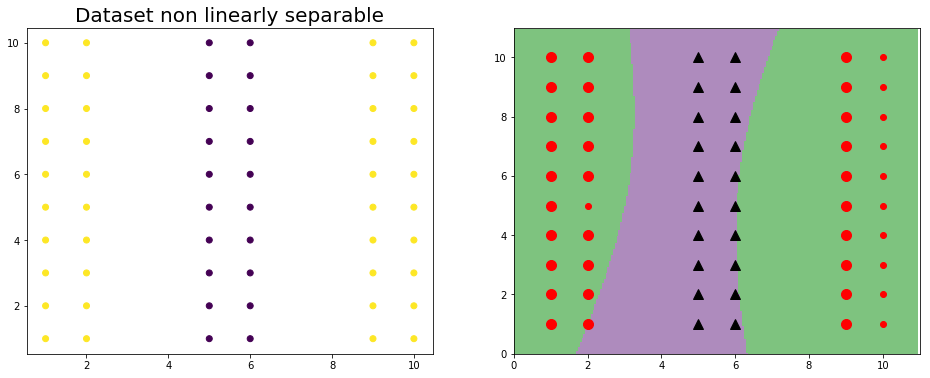

In [9]:
learn_and_display_Kernel_Perceptron(data[4],'polly',2,C_value=1.0, s_value=1.0)

# Resultados RBF

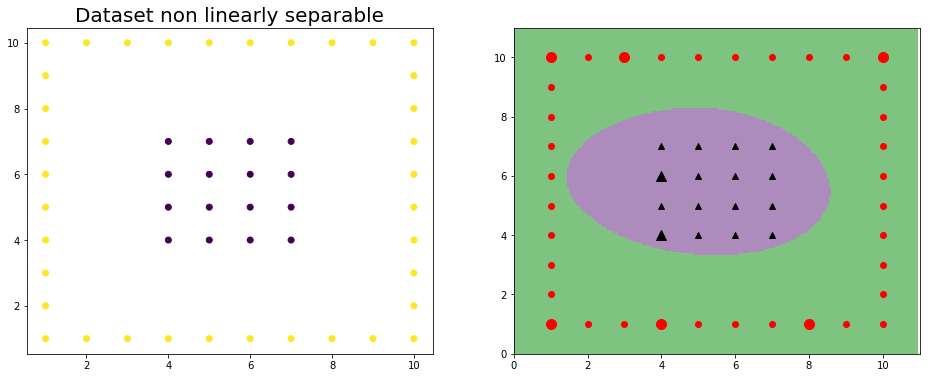

In [10]:
learn_and_display_Kernel_Perceptron(data[0],'rbf',5,C_value=1.0, s_value=1.0)

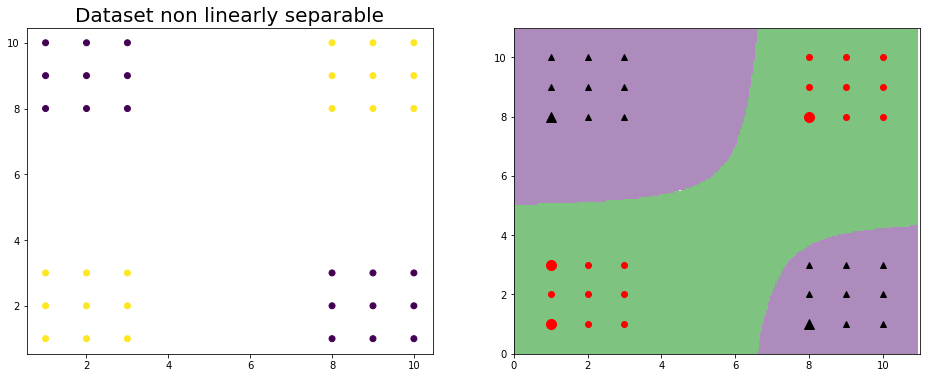

In [11]:
learn_and_display_Kernel_Perceptron(data[1],'rbf',5,C_value=1.0, s_value=1.0)

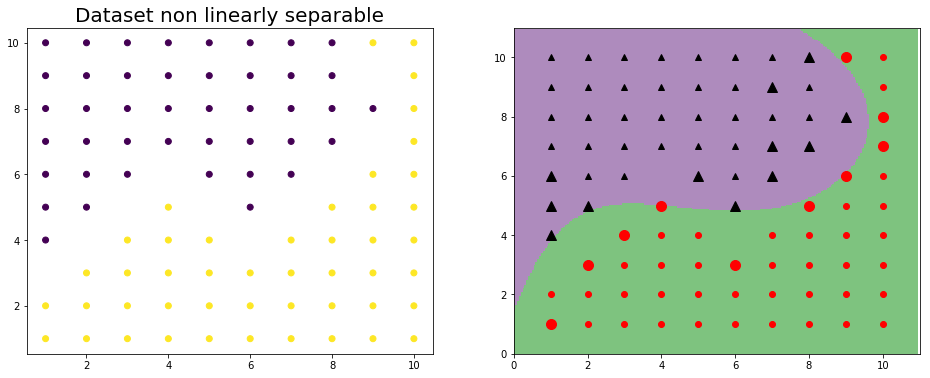

In [12]:
learn_and_display_Kernel_Perceptron(data[2],'rbf',5,C_value=1.0, s_value=1.0)

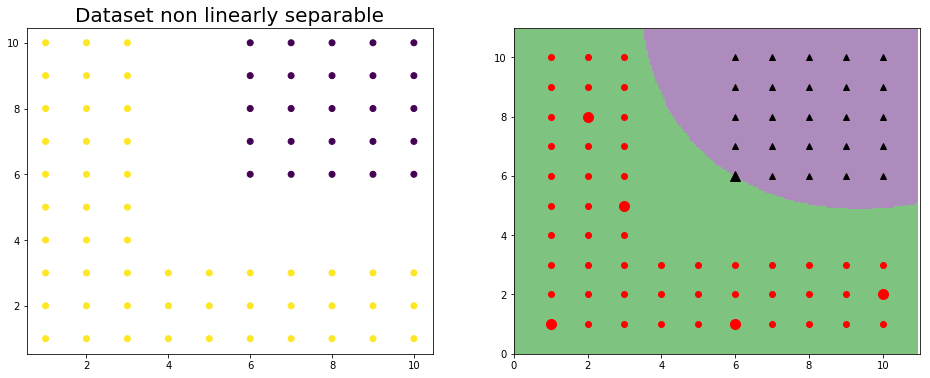

In [13]:
learn_and_display_Kernel_Perceptron(data[3],'rbf',5,C_value=1.0, s_value=1.0)

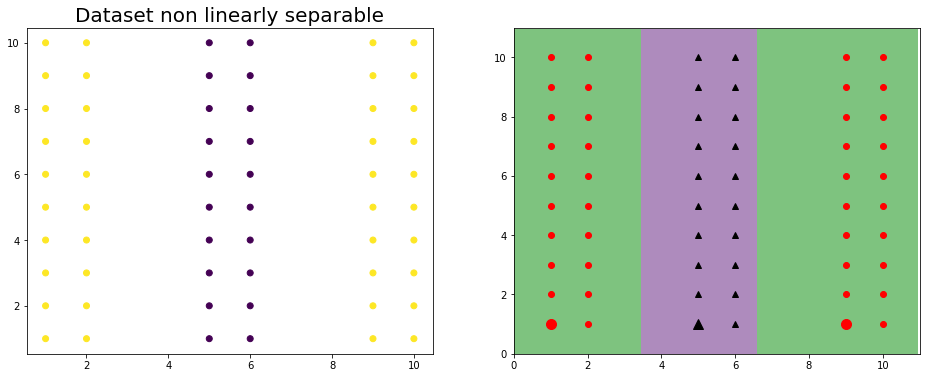

In [14]:
learn_and_display_Kernel_Perceptron(data[4],'rbf',5,C_value=1.0, s_value=1.0)